### Partie 2 : Choix des binômes dans une entreprise (matching)

Pendant cette partie, nous allons travailler avec des graphes de ce format:


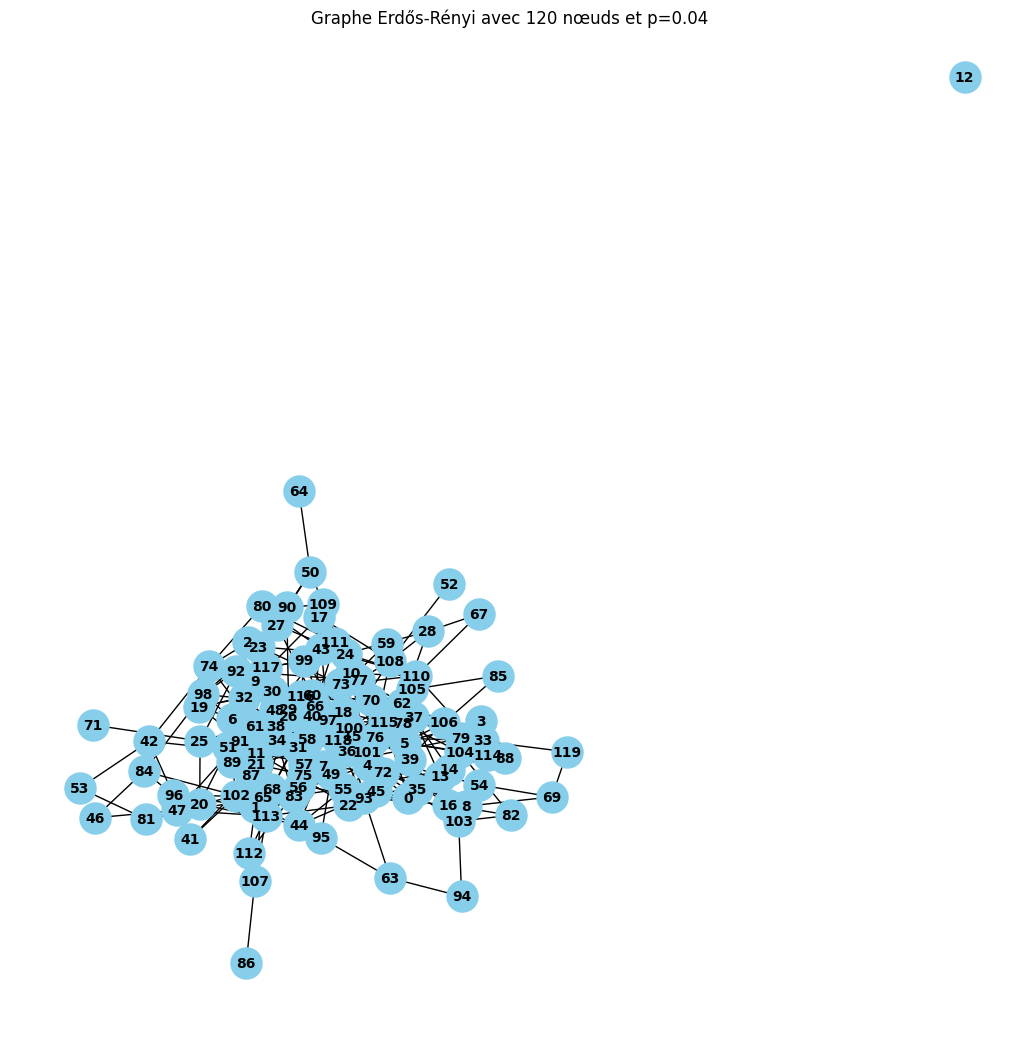

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Génération d'un graphe Gnp avec 120 nœuds et p=0.04
G = nx.gnp_random_graph(n=120, p=0.04)

# Visualisation du graphe
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold")
plt.title("Graphe Erdős-Rényi avec 120 nœuds et p=0.04")
plt.show()

#### Exercice 1 : Implémentation de deux heuristiques basées sur le degré

Pour cet exercice, nous allons choisir deux heuristiques basées sur le degré et effectuer des appariements sur les graphes générés. Les deux heuristiques doivent s'exécuter en temps polynomial.

1. **Heuristique 1 : MinGreedy**

    Cette heuristique sélectionne à chaque itération l'arête incidente à un nœud de degré minimum.

2. **Heuristique 2 : KarpSipser**

    Cette heuristique sélectionne à chaque itération une arête incidente à un nœud de degré 1 s'il en existe, sinon elle sélectionne une arête incidente à un nœud de degré minimum.

#### Code des heuristiques

In [29]:
import networkx as nx
import random
from typing import List, Tuple

import networkx as nx
import random
from typing import List, Tuple

def min_greedy_matching(G: nx.Graph) -> List[Tuple[int, int]]:
    matching = []
    G = G.copy()
    while G.number_of_edges() > 0:
        min_degree_node = min(G.nodes, key=G.degree)
        neighbors = list(G.neighbors(min_degree_node))
        if neighbors:
            chosen_neighbor = random.choice(neighbors)
            matching.append((min_degree_node, chosen_neighbor))
            G.remove_node(min_degree_node)
            G.remove_node(chosen_neighbor)
        else:
            G.remove_node(min_degree_node)  # Supprime le nœud s'il n'a pas de voisins
    return matching

def karp_sipser_matching(G: nx.Graph) -> List[Tuple[int, int]]:
    matching = []
    G = G.copy()
    while G.number_of_edges() > 0:
        degree_one_nodes = [n for n in G.nodes if G.degree[n] == 1]
        if degree_one_nodes:
            node = random.choice(degree_one_nodes)
        else:
            node = min(G.nodes, key=G.degree)
        neighbors = list(G.neighbors(node))
        if neighbors:
            chosen_neighbor = random.choice(neighbors)
            matching.append((node, chosen_neighbor))
            G.remove_node(node)
            G.remove_node(chosen_neighbor)
        else:
            G.remove_node(node)  # Supprime le nœud s'il n'a pas de voisins
    return matching


#### Vérification des heuristiques

Pour vérifier que nos heuristiques retournent bien des appariements, nous exécutons la fonction test_matching présente dans le fichier `test_matching.py`:

In [30]:
from test_matching import test_matching

test_matching(nodes=G.nodes(), edges_list=G.edges(), matching=karp_sipser_matching(G))
test_matching(nodes=G.nodes(), edges_list=G.edges(), matching=min_greedy_matching(G))

selected of nodes is a matching
selected of nodes is a matching


#### Comparaison des heuristiques

Nous comparons les deux heuristiques en termes de taille de l'appariement retourné et de temps de calcul mesuré :


min_greedy_matching
---
   n=200
       test 0/100
       test 10/100
       test 20/100
       test 30/100
       test 40/100
       test 50/100
       test 60/100
       test 70/100
       test 80/100
       test 90/100
   n=400
       test 0/100
       test 10/100
       test 20/100
       test 30/100
       test 40/100
       test 50/100
       test 60/100
       test 70/100
       test 80/100
       test 90/100
   n=600
       test 0/100
       test 10/100
       test 20/100
       test 30/100
       test 40/100
       test 50/100
       test 60/100
       test 70/100
       test 80/100
       test 90/100
   n=800
       test 0/100
       test 10/100
       test 20/100
       test 30/100
       test 40/100
       test 50/100
       test 60/100
       test 70/100
       test 80/100
       test 90/100
   n=1000
       test 0/100
       test 10/100
       test 20/100
       test 30/100
       test 40/100
       test 50/100
       test 60/100
       test 70/100
       test 80/100
   

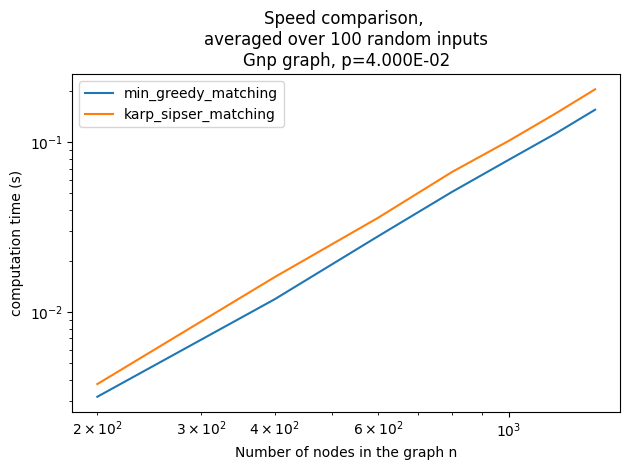


min_greedy_matching
---


ZeroDivisionError: integer modulo by zero

In [47]:
from time import time
from collections.abc import Callable
import networkx as nx
import matplotlib.pyplot as plt

NB_TESTS = 100
P_EDGE = 0.04

def plot_computational_time(
        func_name: str,
        func: Callable,
        n_list: list,
        ) -> None:
    print(f"\n{func_name}\n---")
    times = list()
    for n in n_list:
        print(f"   n={n}")
        times_for_n = list()
        for test_index in range(NB_TESTS):
            if test_index % (NB_TESTS//10) == 0:
                print(f"       test {test_index}/{NB_TESTS}")
            G = nx.generators.gnp_random_graph(n, P_EDGE)
            tic = time()
            matching = func(G)
            toc = time()
            elapsed_time = toc-tic
            times_for_n.append(elapsed_time)
        average_time_for_n = sum(times_for_n)/NB_TESTS
        times.append(average_time_for_n)
    plt.plot(n_list, times, label=func_name)



n_list = [200, 400, 600, 800, 1000, 1200, 1400]
functions = dict()
functions["min_greedy_matching"] = min_greedy_matching
functions["karp_sipser_matching"] = karp_sipser_matching

for func_name in functions:
    plot_computational_time(func_name=func_name, func=functions[func_name], n_list=n_list)

title = (
        "Speed comparison, "
        f"\naveraged over {NB_TESTS} random inputs"
        f"\nGnp graph, p={P_EDGE:.3E}"
        )

plt.title(title)
plt.legend(loc="best")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("computation time (s)")
plt.xlabel("Number of nodes in the graph n")
plt.tight_layout()
plt.show()


min_greedy_matching
---
       test 0/1500
       test 150/1500
       test 300/1500
       test 450/1500
       test 600/1500
       test 750/1500
       test 900/1500
       test 1050/1500
       test 1200/1500
       test 1350/1500

karp_sipser_matching
---
       test 0/1500
       test 150/1500
       test 300/1500
       test 450/1500
       test 600/1500
       test 750/1500
       test 900/1500
       test 1050/1500
       test 1200/1500
       test 1350/1500


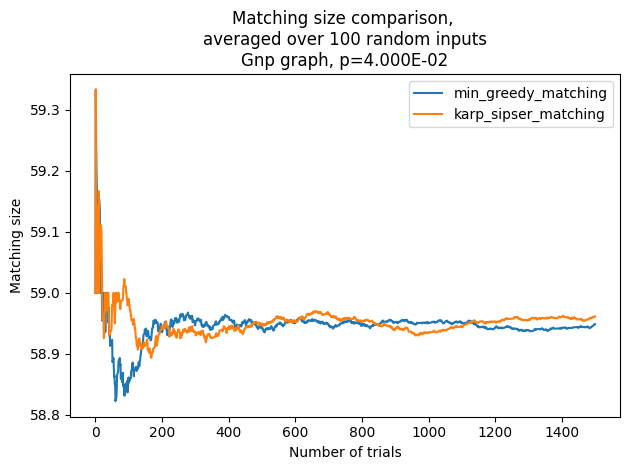

In [51]:
def plot_matching_size(
        func_name: str,
        func: Callable,
        n_of_trials: int,
        ) -> None:
    print(f"\n{func_name}\n---")
    matching_sizes = list()
    average_matching_sizes = list()
    for test_index in range(n_of_trials):
        if test_index % (n_of_trials//10) == 0:
            print(f"       test {test_index}/{n_of_trials}")
        G = nx.generators.gnp_random_graph(120, P_EDGE)
        matching = func(G)
        matching_sizes.append(len(matching))
        average_matching_size = sum(matching_sizes)/len(matching_sizes)
        average_matching_sizes.append(average_matching_size)
    plt.plot(range(n_of_trials), average_matching_sizes, label=func_name)

for func_name in functions:
    plot_matching_size(func_name=func_name, func=functions[func_name], n_of_trials=1500)

title = (
        "Mean matching size,"
        "120 nodes, p_edge=0.04"
        )

plt.title(title)
plt.ylabel("Matching size")
plt.xlabel("Number of trials")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Preuve de la complexité

Pour prouver que les deux heuristiques s'exécutent en temps polynomial, nous devons analyser leur complexité temporelle. Les deux heuristiques itèrent sur les arêtes du graphe, et à chaque étape, elles suppriment des nœuds et leurs arêtes incidentes. Dans le pire des cas, chaque itération nécessite une recherche linéaire pour trouver le nœud de degré minimum ou de degré 1. Ainsi, la complexité temporelle de chaque heuristique est \(O(n^2)\), où \(n\) est le nombre de nœuds.